In [1]:
from keras.applications.resnet50 import ResNet50
from keras.datasets import cifar100
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from PIL import Image
import numpy as np

import json

Using TensorFlow backend.


In [2]:
## モデル読み込み
model = ResNet50(include_top=True, weights='imagenet',
    input_tensor=None, input_shape=None, pooling=None, classes=1000)

## ラベル読み込み
with open('image-net-labels.json') as f:
    labels = json.load(f)

## データ読み込み
# (x_train, y_train), (x_test, y_test) = cifar100.load_data()
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## データサンプリング
x_test = x_test[:500]

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
## 推論
results = []
for i, array in enumerate(x_test):
    ## 画像読み込み
    image = Image.fromarray(array)
    ## リサイズ (input tensorのshapeに合わせる)
    image = image.resize((224, 224))
    ## tensor化
    y = np.asarray(image)
    ## 次元拡張 (input tensorのshapeに合わせる)
    y = np.array([ y, y, y ])
    y = np.transpose(y, (1, 2, 0))
    y = np.expand_dims(y, axis=0)

    ## 推論
    y_probs = model.predict(y)
    ## 推論結果で一番可能性が高いものを取得
    y_class = y_probs.argmax(axis=-1)

    ## build result
    result = {}
    result['image'] = image
    result['class'] = labels[str(y_class[0])]
    result['prob'] = y_probs[0][y_class][0]
    results.append(result)

# sort results
results = sorted(results, reverse=True, key=lambda v: v['prob'])

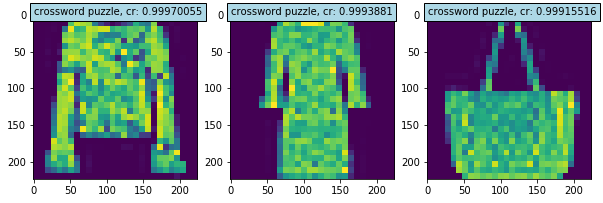

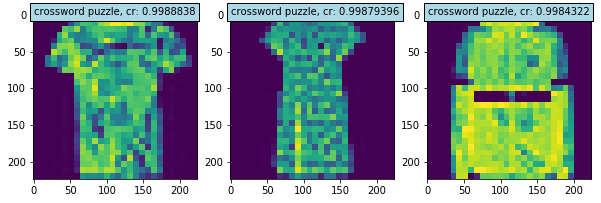

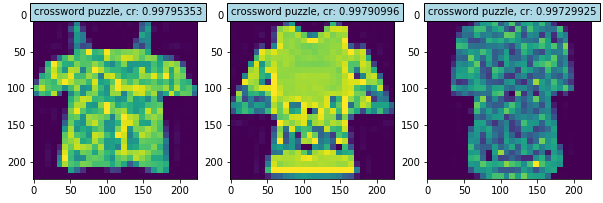

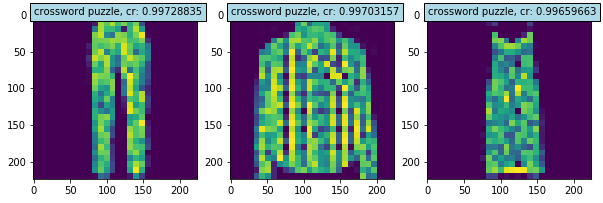

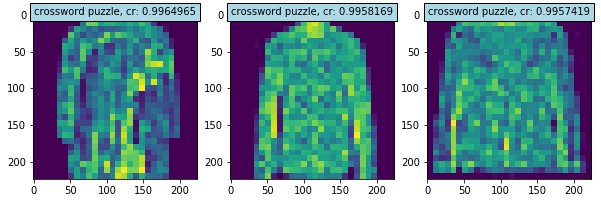

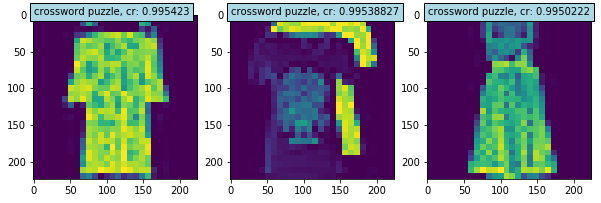

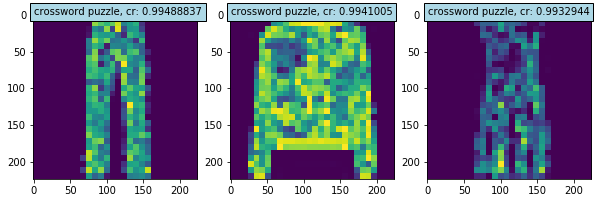

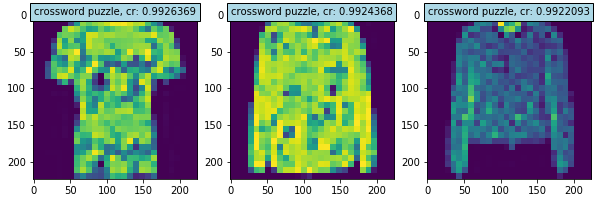

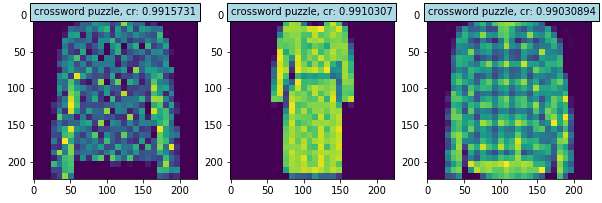

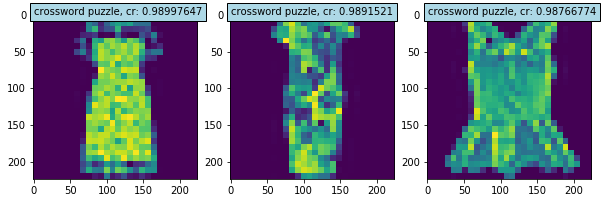

In [18]:
## show detail
## parse results
results_list = np.reshape(results[:30], (-1, 3))

for j, results in enumerate(results_list):
    fig, ax = plt.subplots(1, 3, figsize=(10, 10))
    for k, result in enumerate(results):
        ax[k].imshow(np.asarray(result['image']))
        ax[k].text(0.2, 0.2,  str(result['class'])[:20] + ': ' + str(result['prob']),
            size=10, color='black', bbox={ 'facecolor': 'lightblue' })